# Unsupervised Learning: Clustering Lab





In [33]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Means model with the paramaters K-means(n_clusters=3, init='random', n_init=1)

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [34]:
# K-means with Abalone

def get_abalone_x ():
  ds = arff.loadarff('abalone.arff')
  df = pd.DataFrame(ds[0])

  dfnp = df.to_numpy()

  X = dfnp
  return X

def abalone_kmeans_cluster(X):
  kmeans = KMeans(n_clusters=3, init='random', n_init=1)
  kmeans.fit(X)

  y = kmeans.fit_predict(X)
  sil_avg = silhouette_score(X, y)

  return kmeans.labels_, kmeans.cluster_centers_, kmeans.n_iter_, kmeans.inertia_, sil_avg

In [35]:
X = get_abalone_x()

labels, centers, iter, inertia, sil_avg = abalone_kmeans_cluster(X)

print(labels)
print(centers)
print(iter)
print(inertia)
print(sil_avg)

[0 1 2 2 1 1 0 0 2 0 0 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 1 0
 1 2 2 2 0 1 1 1 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 2 0 2 1 0 1 0 2
 0 0 2 2 2 0 2 2 0 0 0 2 0 2 2 2 0 2 0 2 0 0 2 1 1 2 1 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 1 0 1 1 1 1 1 0 0 0 2 1 1 1 1 1 2 2 2 2 2 0 2 2 2 2 2
 1 1 0 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 1 1 1 1 1 1 1 1 2 0 0 2 2 2
 0 2 2 2 2 0 2 0 1 2 2 2 0 0 2]
[[ 0.61092593  0.4837963   0.16916667  1.2580463   0.48016667  0.25992593
   0.42623148 15.46296296]
 [ 0.37518868  0.28754717  0.09283019  0.31228302  0.13264151  0.07159434
   0.09832075  6.79245283]
 [ 0.52295699  0.41080645  0.1388172   0.76        0.30589247  0.17220968
   0.24027419 10.23655914]]
9
529.2542834566343
0.5184231751282088


*Discussion*

In this task I learned how to use the KMeans Clusterer. I initialized the abalone dataset, set up the KMeans Clusterer, and ran it on the dataset. I did this because I wanted to learn how to use the KMeans Clusterer. The silhouette is rather high (around 0.5 on the -1 to 1 scale). This is because the clusters are small and dense, which is good. Note that the number of iterations needed is rather small. I was surprised to observe the large total sum squared error. I am not sure why it is so large, but my hypothesis is that its the total error, not the average error.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC)

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [36]:
# HAC with Abalone

def abalone_hac_cluster(X):
  hac = AgglomerativeClustering(n_clusters=3, linkage='complete')
  hac.fit(X)

  y = hac.fit_predict(X)
  sil_avg = silhouette_score(X, y)

  return hac.labels_, sil_avg

In [37]:
X = get_abalone_x()

labels, sil_avg = abalone_hac_cluster(X)

print(labels)
print(sil_avg)

[1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 2 2 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 1
 1 1 0 0 1 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 1 1 2 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0]
0.5398112398376158


*Discussion*

In this task I learned how to use the HAC Clusterer. I initialized the abalone dataset, set up the HAC Clusterer, and ran it on the dataset. I did this because I wanted to learn how to use the HAC Clusterer. The silhouette is rather high (around 0.5 on the -1 to 1 scale). This is because the clusters are small and dense, which is good. Note that the sihouette is slightly higher than KMeans. I was surprised that we didn't report the needed number of iterations or the inertia. I am not sure why we didn't do this, but my hypothesis is that it works similarly to the KMeans version, so it isn't very useful here.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [38]:
# K-means initial centroid experiments

def get_iris_x ():
  Data_Set = arff.loadarff('iris.arff')
  Data_Set_df = pd.DataFrame(Data_Set[0])

  Data_Set_np = Data_Set_df.to_numpy()

  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  return X

def iris_kmeans_cluster(X, ini, n):
  kmeans = KMeans(n_clusters=4, init=ini, n_init=n)
  kmeans.fit(X)

  y = kmeans.fit_predict(X)
  sil_avg = silhouette_score(X, y)

  return kmeans.inertia_, sil_avg

In [39]:
X = get_iris_x()

for i in range(5):
  inertia, sil_avg = iris_kmeans_cluster(X, 'random', 1)
  print("Run #", i+1, ": inertia: ", inertia, ", silhouette: ", sil_avg, ".")
print()

inertia, sil_avg = iris_kmeans_cluster(X, 'random', 5)
print("n_init=5: inertia: ", inertia, ", silhouette: ", sil_avg, ".")
print()

inertia, sil_avg = iris_kmeans_cluster(X, 'k-means++', 1)
print("k-means++: inertia: ", inertia, ", silhouette: ", sil_avg, ".")

Run # 1 : inertia:  57.344923809523806 , silhouette:  0.49699284998335724 .
Run # 2 : inertia:  71.34044682436699 , silhouette:  0.4171050599264815 .
Run # 3 : inertia:  57.47327326549492 , silhouette:  0.49511999553021513 .
Run # 4 : inertia:  57.34540931571814 , silhouette:  0.4972279726640147 .
Run # 5 : inertia:  71.348223518285 , silhouette:  0.41540495586480414 .

n_init=5: inertia:  57.371759292881016 , silhouette:  0.49595535840401567 .

k-means++: inertia:  71.65709026750072 , silhouette:  0.4138182616967796 .


Results and Discussion

In this task I used the K-Means Clusterer to learn the Iris dataset. I initialized the Iris dataset, initialized the K-Means Clusterer with several different methods, and ran the K-Means Clusterer for each method. I did this because I wanted to see how looping, setting n_init to >1, and using k-means++ performed. The looping has variating results, with higher inertia scores tied to lower silhouette scores. This is because inertia is an error score, so higher error means worse clusters (scattered, intermixed, etc.). Note that using n_init=5 resulted in the highest silouette score and the lowest inertia score. I was surprised to observe that using k-means++ often gives a score slightly below that of n_init=5's. I am not sure why this is, but my hypothesis is that k-means++ doesn't have the advantage of running multiple times with the regular k-means algorithm.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

In [40]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer

def iris_kmeans_silhouette(X, k):
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(X)
  print("Inertia:", kmeans.inertia_)

  y = kmeans.fit_predict(X)
  sil_avg = silhouette_score(X, y)
  print("Silhouette:", sil_avg)

  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(X)
  visualizer.show()

k: 2
Inertia: 152.36870647733906
Silhouette: 0.6808136202936816


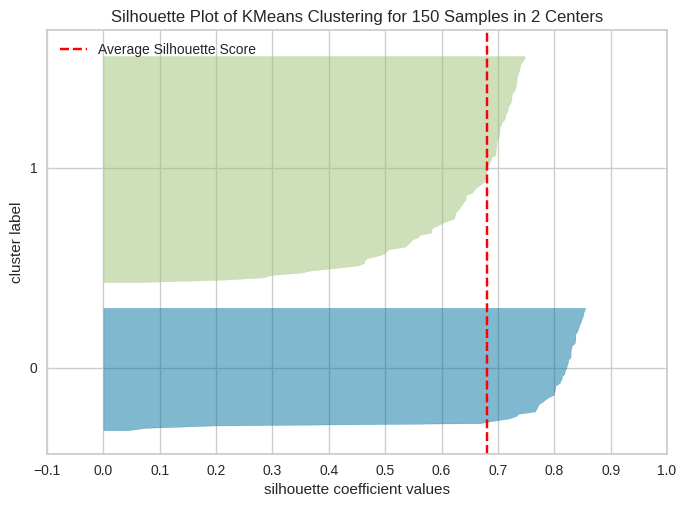

k: 3
Inertia: 78.940841426146
Silhouette: 0.5525919445499757


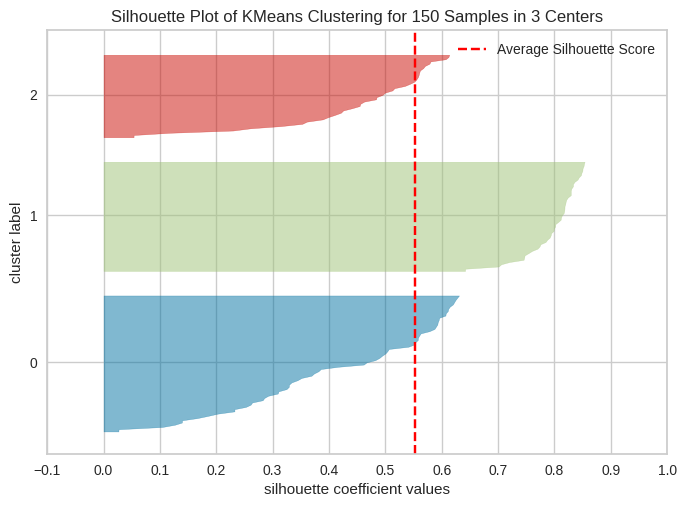

k: 4
Inertia: 57.317873214285704
Silhouette: 0.4978256901095472


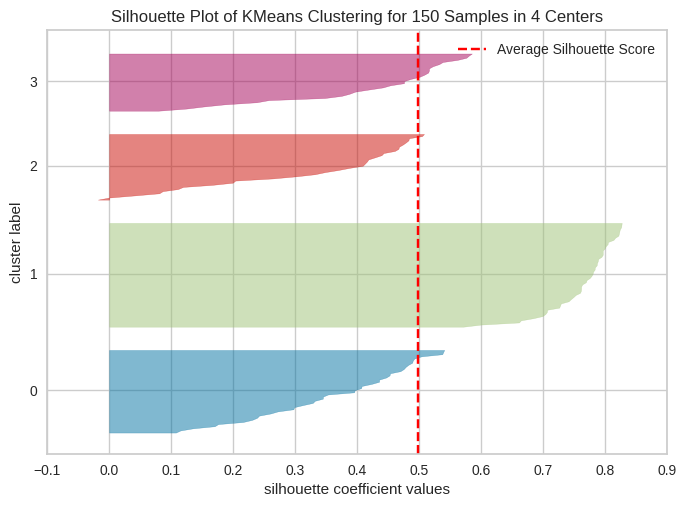

k: 5
Inertia: 46.53558205128205
Silhouette: 0.4885175508886279


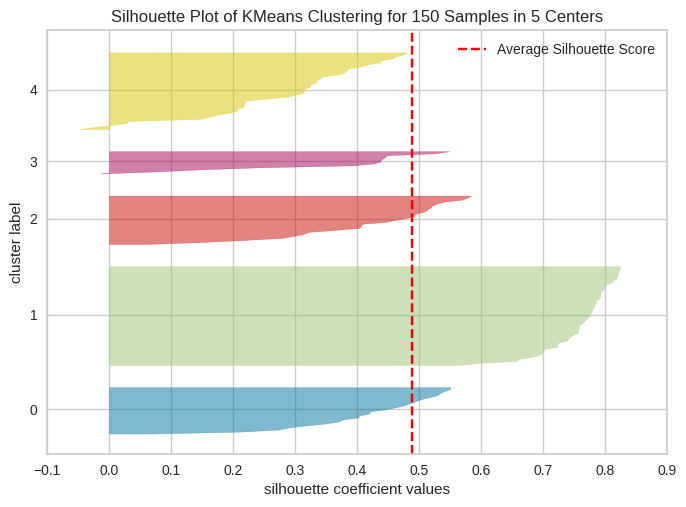

k: 6
Inertia: 38.930963049671746
Silhouette: 0.3695162748599971


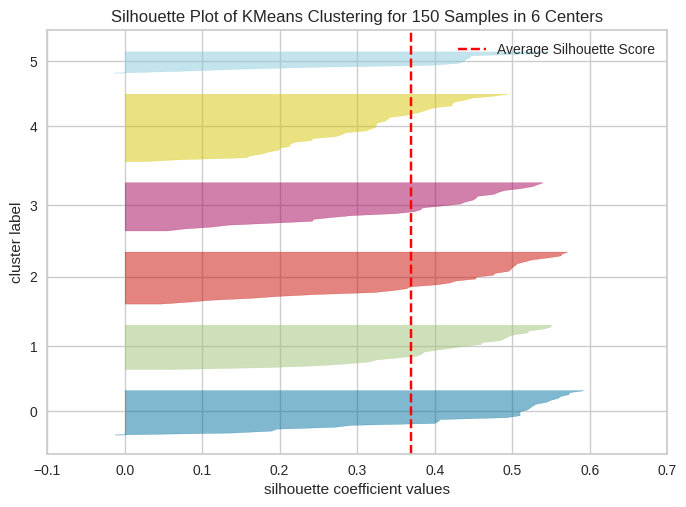

In [41]:
X = get_iris_x()

for i in range(2,7):
  print('k:', i)
  iris_kmeans_silhouette(X, i)

Discuss your results and justify which clustering is best based on the silhouette graphs

In this task I used the Silhouette Visualizer to make silhouette graphs for the Iris dataset. I initialized the Iris dataset, initialized the K-Means Clusterer with the Silhouette Visualizer, and ran both on several different numbers of clusters. I did this because I wanted to see which number of clusters performed the best. k=3 appears to perform the best. It gives a good balance between high silhouette score and low inertia error. Additionally, there are three different possible classes in the dataset, so k=3 would have to be the best. Finally, the sizes of the clusters are about the same, which means that they are split evenly.

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [42]:
#HAC with Iris

def iris_hac_cluster(X, k, link):
  hac = AgglomerativeClustering(n_clusters=k, linkage=link)
  hac.fit(X)

  y = hac.fit_predict(X)
  sil_avg = silhouette_score(X, y)

  return sil_avg

In [43]:
links = ['single', 'average', 'complete', 'ward']

X = get_iris_x()

print(' k |  linkage  | silhouette score ')
for k in range(2,7):
  for l in links:
    print(f' {k} | {l: ^9} | {iris_hac_cluster(X, k, l)}')

 k |  linkage  | silhouette score 
 2 |  single   | 0.6863930543445408
 2 |  average  | 0.6863930543445408
 2 | complete  | 0.5160600757054667
 2 |   ward    | 0.6863930543445408
 3 |  single   | 0.5118387098922373
 3 |  average  | 0.5539343898551252
 3 | complete  | 0.5133502348448076
 3 |   ward    | 0.5540972908150553
 4 |  single   | 0.28177774044073334
 4 |  average  | 0.47166531675930684
 4 | complete  | 0.4995741149430846
 4 |   ward    | 0.4887398491004218
 5 |  single   | 0.2834836728123189
 5 |  average  | 0.4303416822141368
 5 | complete  | 0.34999771139358965
 5 |   ward    | 0.4841553526240121
 6 |  single   | 0.2211144115880162
 6 |  average  | 0.34065865237555976
 6 | complete  | 0.34205174735616767
 6 |   ward    | 0.3618845152256815


*Discussion and linkage comparison*

In this task I trained the HAC Clusterer on the Iris dataset. I initialized the HAC Clusterer for the Iris dataset, set up a table-maker for different k-values and linkages, and ran the HAC Clusterer on the Iris dataset with various different k-values and linkages. I did this because I wanted to see what k-value + linkage combo made the HAC Clusterer perform the best on this dataset. Low k-values increase the silhouette score. This is because, for this dataset, having fewer clusters results in denser clusters. Note that the linkage methods switch performance placements based on how many clusters we have. I was surprised to observe that k=3 didn't have the best silhouette score. I am not sure why the k-value which reflects the true number of classes in the dataset doesn't work the best, but my hypothesis is that it is because two of the three classes in this dataset are clustered very close together.

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different params and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

In [44]:
# Run both algoriths on a data set of your choice

def get_raisin_x ():
  Data_Set = arff.loadarff('raisin.arff')
  Data_Set_df = pd.DataFrame(Data_Set[0])

  Data_Set_np = Data_Set_df.to_numpy()

  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  return X

def raisin_kmeans_cluster(X, k):
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(X)

  y = kmeans.fit_predict(X)
  sil_avg = silhouette_score(X, y)

  return kmeans, sil_avg

def raisin_hac_cluster(X, k):
  hac = AgglomerativeClustering(n_clusters=k)
  hac.fit(X)

  y = hac.fit_predict(X)
  sil_avg = silhouette_score(X, y)

  return hac, sil_avg

KMeans:
 k | silhouette score 
 2 | 0.6546592234290064
 3 | 0.5606036815989972
 4 | 0.5507946238789246
 5 | 0.5454935684651606
Typical labels and silhouette score:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 

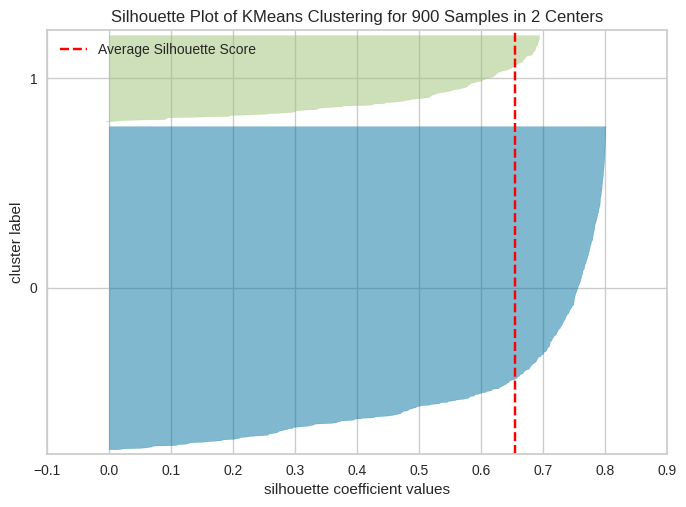


HAC:
 k | silhouette score 
 2 | 0.6562569357806006
 3 | 0.5426986010248313
 4 | 0.54480848633427
 5 | 0.5259970910443776
Typical labels and silhouette score:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 

In [45]:
X = get_raisin_x()

print("KMeans:")

print(' k | silhouette score ')
for k in range(2,6):
  kmeans, sil_avg = raisin_kmeans_cluster(X, k)
  print(f' {k} | {sil_avg}')

print('Typical labels and silhouette score:')
kmeans, sil_avg = raisin_kmeans_cluster(X, 2)
print(kmeans.labels_)
print(sil_avg)

print('Silhouette graph for one reasonable k value:')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

print()

print("HAC:")

print(' k | silhouette score ')
for k in range(2,6):
  hac, sil_avg = raisin_hac_cluster(X, k)
  print(f' {k} | {sil_avg}')

print('Typical labels and silhouette score:')
kmeans, sil_avg = raisin_hac_cluster(X, 2)
print(kmeans.labels_)
print(sil_avg)

*Discussion and comparison*

In this task I tested KMeans and HAC on a new dataset. I initialized the raisin dataset, initialized KMeans and HAC, and ran them on the dataset with several different k values. I did this because I wanted to use what I learned on a new dataset. k=2 seems to be the best k value. This is because the raisin dataset has two classes. Note that the labels and silhouette scores between KMeans and HAC are basically the same. I was surprised to observe the difference in size between the two silhouettes. I am not sure why they have such different sizes, but my hypothesis is that the dataset has more instances of class A than of class B.